In [ ]:
!python -m pip install --upgrade pip
!python -m pip install --quiet https://github.com/tensormatics/SDKPython/releases/download/prod/labellerr_sdk-1.0.0.tar.gz kaggle Pillow requests python-dotenv opencv-python numpy ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'labellerr_sdk' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'labellerr_sdk'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [ ]:
from getpass import getpass
from labellerr.client import LabellerrClient
from IPython.display import display, Markdown

# --- Enter Your Credentials ---
# You can find these in your Labellerr account settings under 'API'.
print("Please enter your Labellerr API credentials.")
LABELLERR_CLIENT_ID = input("Labellerr Client ID: ")
LABELLERR_EMAIL = input("Labellerr Email: ")
LABELLERR_API_KEY = getpass("Labellerr API Key (input will be hidden): ")
LABELLERR_API_SECRET = getpass("Labellerr API Secret (input will be hidden): ")

# Initialize the client to connect to your account
try:
    client = LabellerrClient(LABELLERR_API_KEY, LABELLERR_API_SECRET)
    display(Markdown("✅ Labellerr client initialized successfully!"))
except Exception as e:
    display(Markdown(f"❌ Client Initialization Failed: {e}"))

Please enter your Labellerr API credentials.
Labellerr Client ID: 18514
Labellerr Email: pranaypranshu3011@gmail.com
Labellerr API Key (input will be hidden): ··········
Labellerr API Secret (input will be hidden): ··········


✅ Labellerr client initialized successfully!

In [ ]:
# Step 3: Define Annotation Questions for Polygon Masks
# This configuration tells Labellerr what tools to create in the annotation UI.
# We are using 'polygon' as the option_type as required by the segmentation task.

ANNOTATION_QUESTIONS = [
    {
        "question_number": 1,
        "question": "Vehicle",
        "question_id": "vehicle-polygon-001",
        "option_type": "polygon",  # This is for segmentation
        "required": False,
        "options": [{"option_name": "#FFD700"}]
    },
    {
        "question_number": 2,
        "question": "Pedestrian",
        "question_id": "pedestrian-polygon-002",
        "option_type": "polygon", # This is for segmentation
        "required": False,
        "options": [{"option_name": "#228B22"}]
    },
    {
        "question_number": 3,
        "question": "Bike",
        "question_id": "bike-polygon-003",
        "option_type": "polygon", # This is for segmentation
        "required": False,
        "options": [{"option_name": "#FF0000"}]
    }
]

PROJECT_NAME = "Nighttime Weather Segmentation"
DATASET_NAME = "night_weather_occlusion_train"
DATASET_DESCRIPTION = "Training data for nighttime, harsh weather, and occlusion segmentation."
DATA_TYPE = "image"

In [ ]:
# Step 4: Create the Project and Upload Your Training Images via SDK
import json

try:
    template_response = client.create_annotation_guideline(
        LABELLERR_CLIENT_ID,
        ANNOTATION_QUESTIONS,
        template_name=f"{PROJECT_NAME} Template",
        data_type=DATA_TYPE,
    )

    if isinstance(template_response, str):
        template_id = json.loads(template_response)['response']['template_id']
    else:
        template_id = template_response['response']['template_id']

    display(Markdown(f"✅ Annotation guideline created with ID: {template_id}"))

    # --- Create the Project and Upload the Image Folder ---
    if template_id:
        payload = {
            'client_id': LABELLERR_CLIENT_ID,
            'dataset_name': DATASET_NAME,
            'dataset_description': DATASET_DESCRIPTION,
            'data_type': DATA_TYPE,
            'created_by': LABELLERR_EMAIL,
            'project_name': PROJECT_NAME,
            'annotation_template_id': template_id,
            'autolabel': False,
            'folder_to_upload': '/Train' # IMPORTANT: Change this to your folder path
        }
        project_response = client.initiate_create_project(payload)
        project_id = project_response['project_id']['response']['project_id']
        display(Markdown(f"✅ Project '{PROJECT_NAME}' created with ID: {project_id}"))
        display(Markdown("➡️ **Next Step:** Go to the Labellerr platform to begin annotating your images."))

except Exception as e:
    display(Markdown(f"❌ An error occurred: {e}"))

❌ An error occurred: {'error': {'err': 'Not Authorized (Invalid API Key/Secret)'}, 'code': 403}

b9833a.6f48a7445d9fa49084232c8114, 816e8d81b441e458ba732b1384ace464d3acaf00357784f76b1ee03a8ca2732a

cfba68.178936402992955cd4a94fd54e, 7b6a0fc24a26d85fb16c649ecc83d8f6bb7a5b9fa5f8a8fa92d3ca533b02dd74

In [ ]:
pip install pycocotools opencv-python matplotlib scikit-learn

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


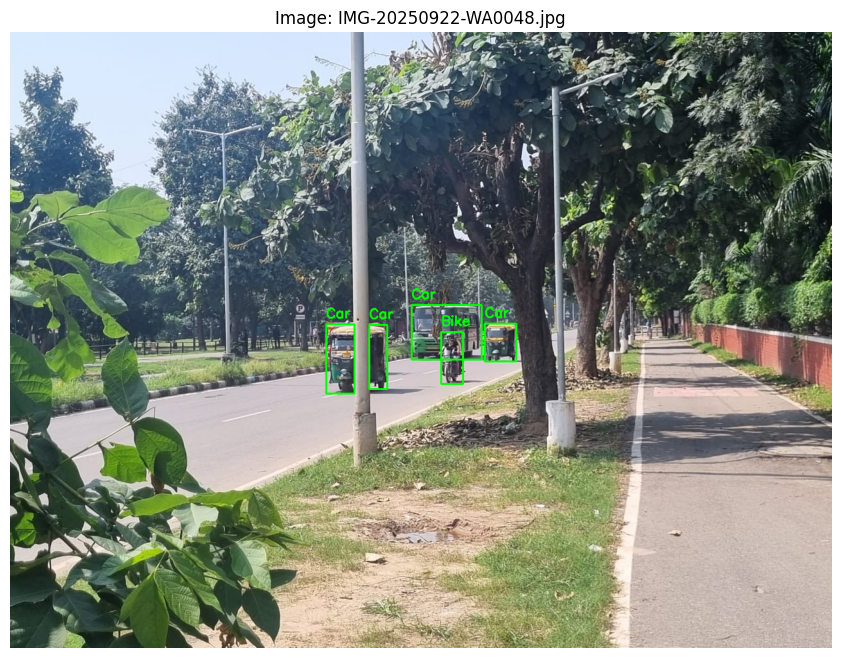

In [ ]:
import os
from pycocotools.coco import COCO
import cv2
import matplotlib.pyplot as plt
import random

# --- Configuration ---
# Path to your COCO JSON annotation file
annotation_file = '/content/CocoJson.json'
# Path to the directory containing your images
image_directory = '/content/train/'

# --- Main Script ---
# Initialize COCO api for instance annotations
coco = COCO(annotation_file)

# Get all image IDs
image_ids = coco.getImgIds()

# Choose a random image to display
random_image_id = random.choice(image_ids)

# Load image metadata
image_info = coco.loadImgs(random_image_id)[0]
image_path = os.path.join(image_directory, image_info['file_name'])

# Load the image
image = cv2.imread(image_path)
# Convert BGR image (from OpenCV) to RGB for Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get all annotation IDs for this image
annotation_ids = coco.getAnnIds(imgIds=image_info['id'])
# Load all annotations for this image
annotations = coco.loadAnns(annotation_ids)

# Draw annotations on the image
for ann in annotations:
    # Get category name
    category_id = ann['category_id']
    category_info = coco.loadCats(category_id)[0]
    category_name = category_info['name']

    # Get bounding box [x, y, width, height]
    bbox = ann['bbox']
    x, y, w, h = [int(i) for i in bbox]

    # Draw the bounding box
    cv2.rectangle(image, (x, y), (x + w, y + h), color=(0, 255, 0), thickness=2)
    # Put the category name text
    cv2.putText(image, category_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.title(f"Image: {image_info['file_name']}")
plt.show()

In [ ]:
import json
from sklearn.model_selection import train_test_split
import os

# --- Configuration ---
# 1. Path to your main COCO JSON file from Labellerr
input_json_path = '/content/CocoJson.json'

# 2. Directory where you want to save the split files
output_dir = '/'

# 3. Train/validation split ratio (0.8 = 80% train, 20% validation)
train_ratio = 0.8

# --- Main Script ---
print(f"Loading annotation file: {input_json_path}")
with open(input_json_path, 'r') as f:
    coco_data = json.load(f)

os.makedirs(output_dir, exist_ok=True)

images = coco_data['images']
annotations = coco_data['annotations']
categories = coco_data['categories']

# Split images into training and validation sets
train_images, val_images = train_test_split(images, train_size=train_ratio, shuffle=True, random_state=42)

train_image_ids = {img['id'] for img in train_images}
val_image_ids = {img['id'] for img in val_images}

train_annotations = [ann for ann in annotations if ann['image_id'] in train_image_ids]
val_annotations = [ann for ann in annotations if ann['image_id'] in val_image_ids]

# Create the training dataset JSON
train_coco = {
    "images": train_images,
    "annotations": train_annotations,
    "categories": categories
}

# Create the validation dataset JSON
val_coco = {
    "images": val_images,
    "annotations": val_annotations,
    "categories": categories
}

# Save the new JSON files
train_output_path = os.path.join(output_dir, 'train.json')
val_output_path = os.path.join(output_dir, 'val.json')

print(f"Saving training annotations to: {train_output_path}")
with open(train_output_path, 'w') as f:
    json.dump(train_coco, f)

print(f"Saving validation annotations to: {val_output_path}")
with open(val_output_path, 'w') as f:
    json.dump(val_coco, f)

print("\nSplit complete!")
print(f"Training images: {len(train_images)}")
print(f"Validation images: {len(val_images)}")

Loading annotation file: /content/CocoJson.json
Saving training annotations to: /train.json
Saving validation annotations to: /val.json

Split complete!
Training images: 93
Validation images: 24


In [ ]:
import yaml

# --- CONFIGURATION ---
# 1. List your class names IN THE EXACT SAME ORDER as in your Labellerr project
class_names = ['Car', 'Pedestrian', 'Bike'] # MODIFY THIS if needed

# 2. Define the paths for your training and validation data
#    Make sure these paths are correct in your Colab environment!
train_images_path = '/content/train/'
val_images_path = '/content/train/' # Use the correct path to validation images if you made a separate folder
train_json_path = '/train.json'
val_json_path = '/val.json'

# --- UPDATE THE YAML STRUCTURE ---
dataset_config = {
    'train': train_images_path,
    'val': val_images_path,

    # Add these lines to specify COCO JSON paths
    'train_json_path': train_json_path,
    'val_json_path': val_json_path,

    'names': class_names,
    'nc': len(class_names)
}

# 4. Write the updated dictionary to a dataset.yaml file
with open('dataset.yaml', 'w') as f:
    yaml.dump(dataset_config, f, default_flow_style=False)

print("Updated dataset.yaml file created successfully!")
print("Please re-run your training script now.")

Updated dataset.yaml file created successfully!
Please re-run your training script now.


In [ ]:
from ultralytics import YOLO

# 1. Load a pre-trained YOLOv8 segmentation model
model = YOLO('yolov8n-seg.pt')

# 2. Train the model using the YAML file
# The 'data' argument points to your dataset.yaml, which contains all the necessary paths.
# This is the only data-related argument you need.
results = model.train(
    data='dataset.yaml',
    epochs=100,
    imgsz=640,
    project='YOLOv8-Training',
    name='vehicle_segmentation'
)

print("\nTraining complete!")
print("Your trained model is saved in the 'YOLOv8-Training/vehicle_segmentation/weights/' directory.")
print("The best performing model is named 'best.pt'. You will use this file for inference.")

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=vehicle_segmentation4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      2/100      4.18G          0          0      113.2          0          0        640: 100% ━━━━━━━━━━━━ 8/8 0.9it/s 9.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.6it/s 6.8s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      3/100      4.18G          0          0      105.1          0          0        640: 100% ━━━━━━━━━━━━ 8/8 2.6it/s 3.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.3it/s 12.9s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      4/100      4.18G          0          0      97.85          0          0        640: 100% ━━━━━━━━━━━━ 8/8 4.0it/s 2.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.3it/s 11.6s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      5/100      4.18G          0          0      91.14          0          0        640: 100% ━━━━━━━━━━━━ 8/8 3.9it/s 2.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 11.0s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      6/100      4.18G          0          0      87.16          0          0        640: 100% ━━━━━━━━━━━━ 8/8 3.9it/s 2.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.8s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      7/100      4.18G          0          0      82.71          0          0        640: 100% ━━━━━━━━━━━━ 8/8 3.8it/s 2.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.5s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      8/100      4.18G          0          0      79.42          0          0        640: 100% ━━━━━━━━━━━━ 8/8 3.9it/s 2.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.8s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      9/100      4.18G          0          0      76.69          0          0        640: 100% ━━━━━━━━━━━━ 8/8 3.9it/s 2.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.6s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
     10/100      4.18G          0          0      75.11          0          0        640: 100% ━━━━━━━━━━━━ 8/8 4.3it/s 1.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.3s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
     11/100      4.18G          0          0      71.69          0          0        640: 100% ━━━━━━━━━━━━ 8/8 4.2it/s 1.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.5s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
     12/100      4.18G          0          0      69.26          0          0        640: 100% ━━━━━━━━━━━━ 8/8 4.3it/s 1.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.4s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
     13/100      4.18G          0          0       66.9          0          0        640: 100% ━━━━━━━━━━━━ 8/8 4.2it/s 1.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.6s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
     14/100      4.18G          0          0      64.14          0          0        640: 100% ━━━━━━━━━━━━ 8/8 4.0it/s 2.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 11.0s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
     15/100      4.18G          0          0      61.95          0          0        640: 100% ━━━━━━━━━━━━ 8/8 3.6it/s 2.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.4it/s 10.3s
                   all        117          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
     16/100      4.18G          0          0      59.89          0          0        640: 100% ━━━━━━━━━━━━ 8/8 3.3it/s 2.5s
